<a href="https://colab.research.google.com/github/Louisa328/Assignment-1/blob/main/Econ_5200_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Spotify', 'Price_2016':9.99 , 'Price_2024':12.99}
]

In [6]:
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Spotify: 30.03% Inflation


In [8]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='55a54e5815bd15d8e2e9ff63c4bc827a')

official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
chipotle = fred.get_series('CUSR0000SEFV')
spotify = fred.get_series('CUSR0000SERA02')

In [11]:
import pandas as pd
df = pd.DataFrame({
    'Official_CPI': official_cpi,
    'Tuition': tuition,
    'Rent': rent,
    'Chipotle': chipotle,
    'Spotify': spotify
})

df_normalized = (df / df.loc['2016-01-01']) * 100

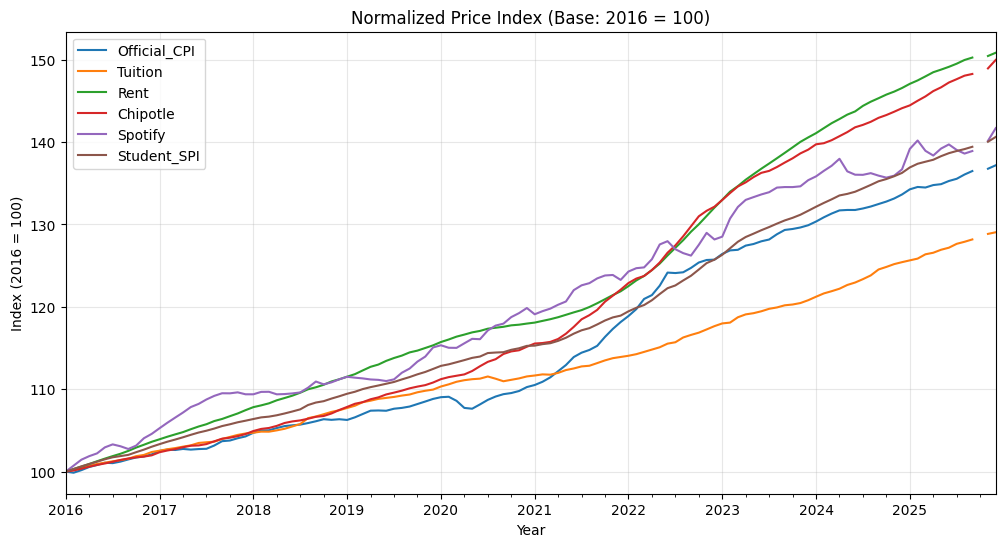

In [16]:
import matplotlib.pyplot as plt

df_normalized_2016 = df_normalized['2016-01-01':]

plt.figure(figsize=(12, 6))
df_normalized_2016.plot(ax=plt.gca())
plt.title('Normalized Price Index (Base: 2016 = 100)')
plt.ylabel('Index (2016 = 100)')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [20]:
weights = {
    'Tuition': 0.4,
    'Rent': 0.3,
    'Chipotle': 0.15,
    'Spotify': 0.15
}


In [21]:
df_normalized['Student_SPI'] = (
    df_normalized['Tuition'] * weights['Tuition'] +
    df_normalized['Rent'] * weights['Rent'] +
    df_normalized['Chipotle'] * weights['Chipotle'] +
    df_normalized['Spotify'] * weights['Spotify']
)

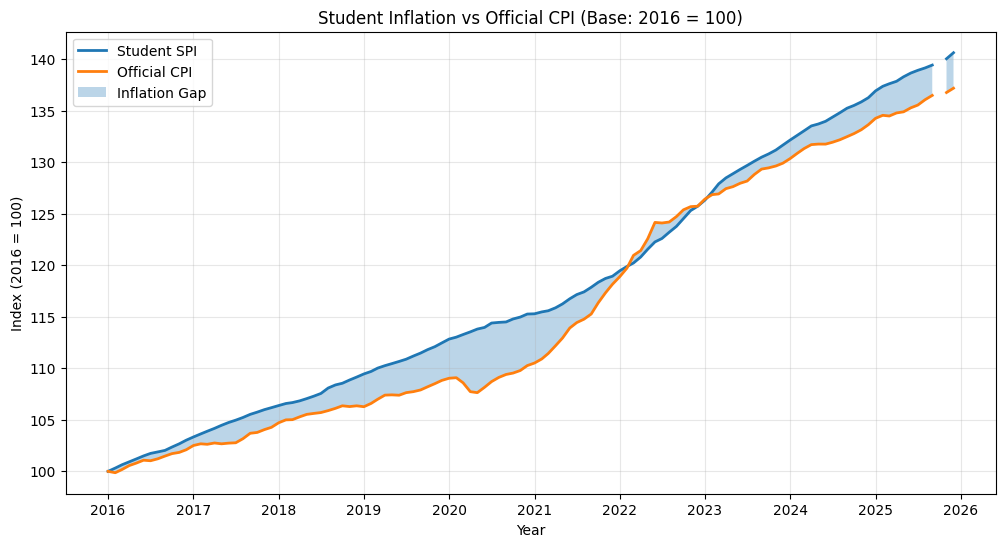

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df_normalized_2016.index, df_normalized_2016['Student_SPI'], label='Student SPI', linewidth=2)
plt.plot(df_normalized_2016.index, df_normalized_2016['Official_CPI'], label='Official CPI', linewidth=2)
plt.fill_between(df_normalized_2016.index,
                 df_normalized_2016['Student_SPI'],
                 df_normalized_2016['Official_CPI'],
                 alpha=0.3, label='Inflation Gap')
plt.title('Student Inflation vs Official CPI (Base: 2016 = 100)')
plt.ylabel('Index (2016 = 100)')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

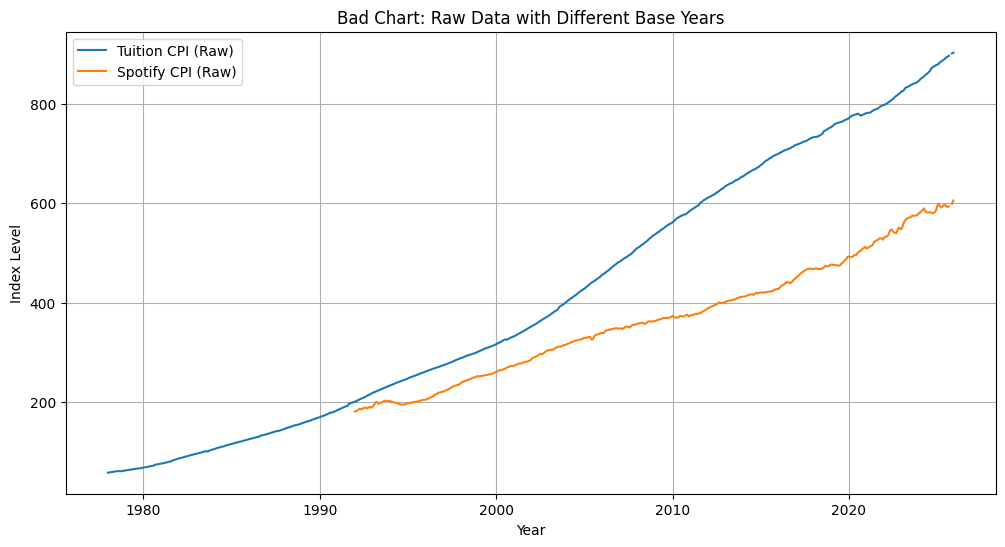

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(tuition.index, tuition, label='Tuition CPI (Raw)')
plt.plot(spotify.index, spotify, label='Spotify CPI (Raw)')

plt.title('Bad Chart: Raw Data with Different Base Years')
plt.xlabel('Year')
plt.ylabel('Index Level')
plt.legend()
plt.grid(True)

plt.show()


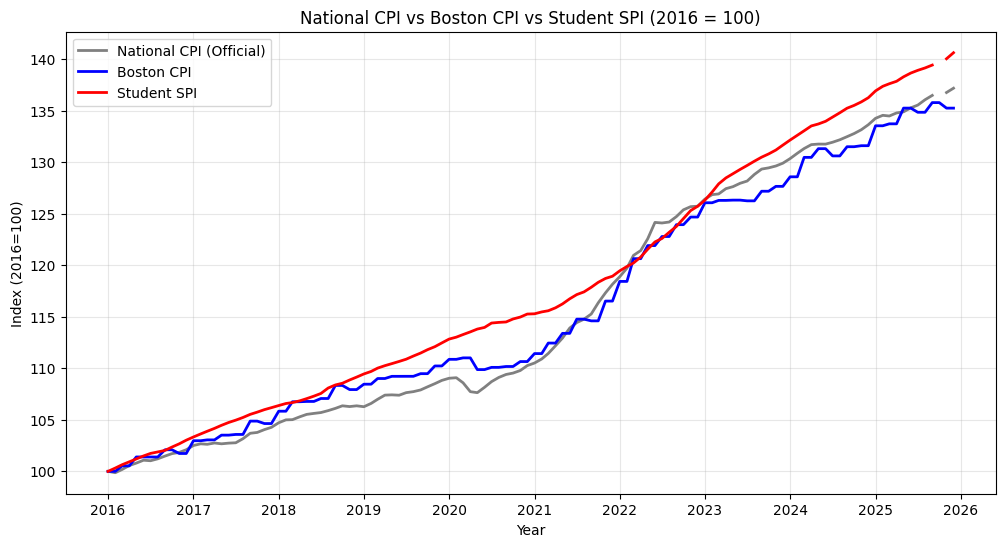

In [37]:
# 1) Fetch Boston CPI-U (All Items) from FRED
boston_cpi = fred.get_series('CUURA103SA0')

# Ensure datetime index
boston_cpi.index = pd.to_datetime(boston_cpi.index)
boston_cpi = boston_cpi.sort_index()

# 2) Re-index Boston series so 2016-01-01 = 100
start_date = pd.Timestamp("2016-01-01")
boston_base = boston_cpi.loc[start_date]
boston_indexed = (boston_cpi / boston_base) * 100

# 3) Align to df_normalized index
df_plot = df_normalized.copy()
df_plot.index = pd.to_datetime(df_plot.index)
df_plot = df_plot.sort_index()

# Reindex Boston to df timeline and fill gaps
df_plot["Boston_CPI"] = boston_indexed.reindex(df_plot.index).ffill()

# 4) Filter from 2016 onwards
df_plot_2016 = df_plot['2016-01-01':]

# 5) Plot three lines
plt.figure(figsize=(12, 6))

plt.plot(df_plot_2016.index, df_plot_2016['Official_CPI'],
         label="National CPI (Official)", color="gray", linewidth=2)
plt.plot(df_plot_2016.index, df_plot_2016["Boston_CPI"],
         label="Boston CPI", color="blue", linewidth=2)
plt.plot(df_plot_2016.index, df_plot_2016["Student_SPI"],
         label="Student SPI", color="red", linewidth=2)

plt.title("National CPI vs Boston CPI vs Student SPI (2016 = 100)")
plt.xlabel("Year")
plt.ylabel("Index (2016=100)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()